In [32]:
# Importamos las librerías necesarias.
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# Leemos nuestras bases de datos.
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [34]:
# a) Describir brevemente la cantidad de valores faltantes para cada una de las variables de la base de datos.

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
# b) Completar aquellas variables que se encuentran faltantes para las bases de train (“Age”,”fare”, “Cabin”) y test ( “Age”, “Cabin”, “embarked”).

# Primero trabajamos con la base de datos train.
# Calculamos el promedio de la columna "Age".
train1 = train.dropna()
mean = train1["Age"].mean()
mean


35.6744262295082

In [37]:
# Completamos los valores faltantes de la columna "Age" con el promedio.
train["Age"] = train["Age"].fillna(mean)


In [38]:
# Mostramos que no hay valores nulos para la columna "Age".
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
# Tomamos la estrategia de poner Unknown a los valores nulos de "Cabin" debido a que tiene una gran cantidad de faltantes.
train['Cabin'].fillna('Unknown', inplace=True)

In [40]:
# Mostramos que no hay valores nulos para la columna "Cabin".
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Para la base de datos train, la columna "Fare" no tiene valores nulos.

In [41]:
# Ahora debemos imputar la columna "Embarked"
train['Embarked'].fillna('Unknown', inplace=True)

In [42]:
# Mostramos que no hay valores nulos.
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [43]:
# Ahora trabajamos con la base de datos test
# Calculamos el promedio de la columna "Age".
test1 = test.dropna()
mean = test1["Age"].mean()
mean

39.247126436781606

In [44]:
# Completamos los valores faltantes de la columna "Age" con el promedio.
test["Age"] = test["Age"].fillna(mean)

In [45]:
# Mostramos que no hay valores nulos para la columna "Age".
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
# Tomamos la estrategia de poner Unknown a los valores nulos de "Cabin" debido a que tiene una gran cantidad de faltantes.
test['Cabin'].fillna('Unknown', inplace=True)

In [47]:
# Mostramos que no hay valores nulos para la columna "Cabin".
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [48]:
# Ahora imputamos sobre la columna "Fare"
# Calculamos el promedio de la columna "Fare".
test2 = test.dropna()
mean = test2["Fare"].mean()
mean

35.627188489208635

In [49]:
# Completamos los valores faltantes de la columna "Fare" con el promedio.
test["Fare"] = test["Fare"].fillna(mean)

In [50]:
# Mostramos que no hay valores nulos.
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Para la base de datos test, la columna "Embarked" no tiene valores nulos.


---



In [51]:
# Mostramos la cantidad de filas y columnas respectivamente tiene la base de datos train.
train.shape


(891, 12)

In [52]:
# Mostramos la cantidad de filas y columnas respectivamente tiene la base de datos test.
test.shape

(418, 11)

In [53]:
# c) Ajustar el primer modelo de regresión logística.

# Definimos las características (X) y la variable objetivo (y) para el conjunto de entrenamiento.
feature_cols = ["Age", "Fare", "Pclass", "Sex", "Embarked", "SibSp", "Parch"]
x = train[feature_cols]
y = train.Survived

# Dividimos en entrenamiento y validación.
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

# Aseguramos que todas las categorías estén presentes en ambos conjuntos de datos antes de la codificación one-hot.
# Lista de columnas a codificar one-hot.
columnas_categoricas = ["Age", "Fare", "Pclass", "Sex", "Embarked", "SibSp", "Parch"]

# Aplicar la codificación one-hot en múltiples columnas.
X_train_encoded = pd.get_dummies(X_train, columns=columnas_categoricas)
X_test_encoded = pd.get_dummies(X_test, columns=columnas_categoricas)

# Aseguramos que las columnas en X_test coincidan con las columnas en X_train después de la codificación one-hot.
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)
y_pred = logreg.predict(X_test_encoded)


In [54]:
# Revisamos qué valores nos entrega la variable de salida predicha en test.
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1])

Text(0.5, 23.52222222222222, 'Etiqueta de predicción')

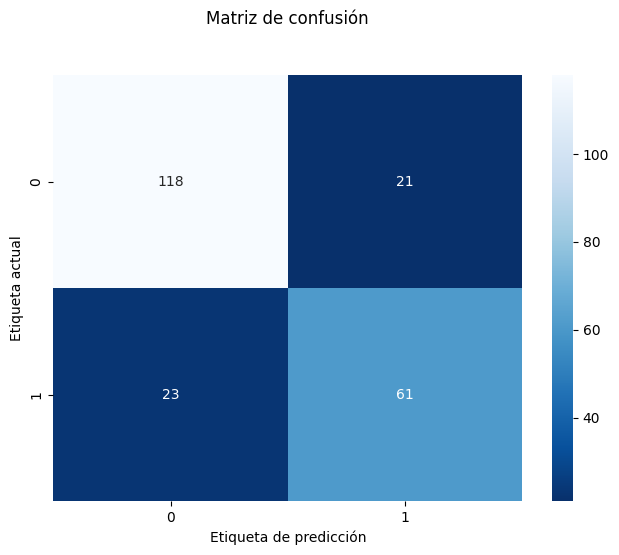

In [55]:
# d) Entrenamos y determinamos el nivel de accuracy del primer modelo.

# Graficamos la predicción con una matriz de confusión.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig,ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks, class_names)
plt.yticks(ticks_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap= "Blues_r", fmt="g")
plt.tight_layout()
plt.title("Matriz de confusión", y = 1.1)
plt.ylabel("Etiqueta actual")
plt.xlabel("Etiqueta de predicción")

In [56]:
# Determinamos el nivel de Accuracy.
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.8026905829596412


Tenemos un 80% de elementos clasificados correctamente.